In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("Dataset .csv")

In [24]:
df['Original Restaurant Name'] = df['Restaurant Name']

In [25]:
df = df.drop([
    "Restaurant ID", "Address", 
    "Locality", "Locality Verbose", "Switch to order menu"
], axis=1)

In [26]:
df['Cuisines'] = df['Cuisines'].fillna("Others")
df['Aggregate rating'] = df['Aggregate rating'].fillna(df['Aggregate rating'].mean())
df = df.dropna()

In [27]:
label_enc = LabelEncoder()
categorical_cols = ['City', 'Restaurant Name', 'Cuisines', 'Currency', 
                    'Has Table booking', 'Has Online delivery', 'Is delivering now',
                    'Rating color', 'Rating text']

for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])

In [28]:
X = df.drop(['Aggregate rating', 'Original Restaurant Name'], axis=1)
y = df['Aggregate rating']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [30]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [37]:
row_index = 1561
sample_input = X.iloc[[row_index]]
actual_rating = y.iloc[row_index]
predicted_rating = model.predict(sample_input)

print("\n------ Rating for Selected Restaurant ------")
print(f"Row Index        : {row_index}")
print(f"Predicted Rating : {predicted_rating[0]:.2f}")
print(f"Actual Rating    : {actual_rating:.2f}")


original_name = df['Original Restaurant Name'].iloc[row_index]
city_name = df['City'].iloc[row_index]
print(f"Restaurant Name  : {original_name}")
print(f"City             : {city_name}")


------ Rating for Selected Restaurant ------
Row Index        : 1561
Predicted Rating : 3.50
Actual Rating    : 3.50
Restaurant Name  : Starbucks
City             : 50


In [38]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n------ Model Evaluation ------")
print(f"Mean Squared Error (MSE) : {mse:.4f}")
print(f"R-squared (R² Score)     : {r2:.4f}")


------ Model Evaluation ------
Mean Squared Error (MSE) : 0.0601
R-squared (R² Score)     : 0.9736


In [39]:
importances = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\n------ Most Influential Features ------")
print(importance_df.head(5))


------ Most Influential Features ------
            Feature  Importance
14            Votes    0.899788
12     Rating color    0.089388
4          Latitude    0.002539
3         Longitude    0.002477
0   Restaurant Name    0.002199


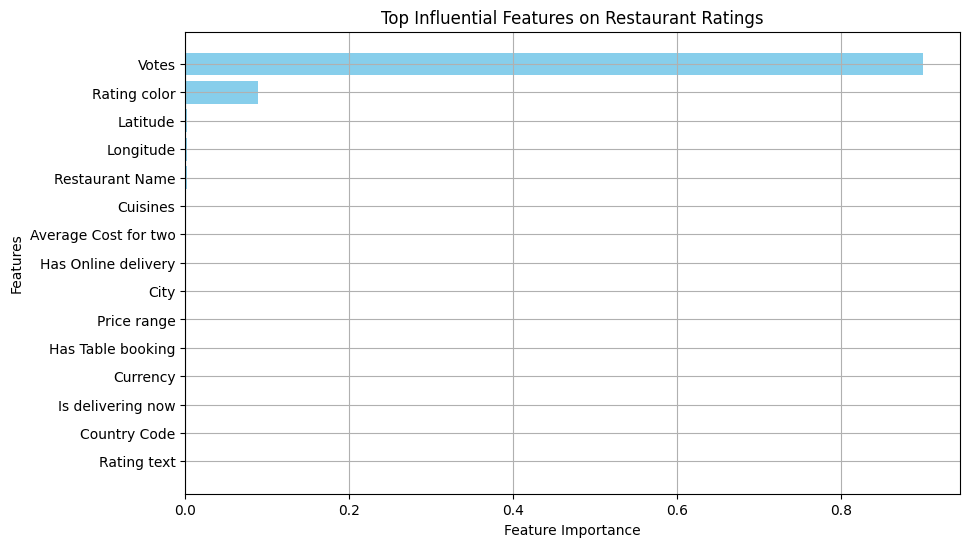

In [40]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top Influential Features on Restaurant Ratings')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()